**Sentiment analysing for  stok market  using news website updates and central bank wb site updates**

1.scraping data from

1.   https://bizenglish.adaderana.lk/
2.   https://www.dailymirror.lk/business/215
3.   https://www.dailymirror.lk/mirror-business/245/0
4.   https://www.cbsl.gov.lk/news/the+central+bank+of+sri+lanka+significantly+tightens+its+monetary+policy+stance+to+stabilise+the+economy

web sites  and thair different pages



2.Adding data to a one data frame called 'df'

All the other steps are  described  using text as a topic  more detils and more explanations are avilable in project report inclouding  plots and screeshots


!!special notice!!
* This is  extracting the real time news from  news websites , the plots and sentiment analyisis process in directly correlated to the data and the plots and anayitics might be changed depend on the time



In [ ]:

#!pip install requests beautifulsoup4





In [ ]:
import pandas as pd

import requests
from bs4 import BeautifulSoup
import pandas as pd
import spacy
import nltk

extracting data from ada derana biz

In [ ]:



# Fetch the webpage content
url = "https://bizenglish.adaderana.lk/"
response = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all <p> tags and clean the extracted text
p_texts = [p.get_text().strip() for p in soup.find_all('p') if p.get_text().strip()]

# Load the cleaned data into a pandas DataFrame
df = pd.DataFrame(p_texts, columns=["Paragraph Text"])

# Display the cleaned DataFrame
print(df.head())


                                      Paragraph Text
0                                         Lead Story
1  Macksons Minerals & Polymers (Pvt) Ltd, a subs...
2                                           Top News
3  The IMF is reviewing recent tax revision annou...
4  The Central Bank of Sri Lanka (CBSL) has taken...


In [ ]:

# Remove rows where the text has fewer than 4 words
df = df[df['Paragraph Text'].str.split().apply(len) >= 3].reset_index(drop=True)

# Display the updated DataFrame
print(df)


                                       Paragraph Text
0   Macksons Minerals & Polymers (Pvt) Ltd, a subs...
1   The IMF is reviewing recent tax revision annou...
2   The Central Bank of Sri Lanka (CBSL) has taken...
3   Divasa Pharma Limited, providing factual clari...
4   Latest launches include the new Zenbook S 14 a...
5   It’s the holiday season, and we’ve got a whole...
6   Oxford College of Business (OCB), Sri Lanka’s ...
7   Global cybersecurity leader Kaspersky has appo...
8   The Magic Mango Group marks yet another year o...
9   Eva, Sri Lanka’s market leader in feminine hyg...
10  By Dr Kapila Fonseka, Executive Director – Ins...
11  A nutritious choice for health-conscious consu...
12  PayMedia, a leader in fintech innovation, has ...
13  SLT-MOBITEL is proud to announce it has secure...
14  The IMF is reviewing recent tax revision annou...
15  The Central Bank of Sri Lanka (CBSL) has taken...
16  Divasa Pharma Limited, providing factual clari...
17  Leader among banks in th

extracting data from daily mirror bussiness web

In [ ]:


# Fetch the webpage content
url = "https://www.dailymirror.lk/business/215"
response = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all <p> tags and clean the extracted text
p_texts = [p.get_text().strip() for p in soup.find_all('p') if p.get_text().strip()]

# Load the cleaned data into a pandas DataFrame
df2 = pd.DataFrame(p_texts, columns=["Paragraph Text"])


# Display the cleaned DataFrame
print(df2.head())



  Paragraph Text
0       Daily FT
1   Sunday Times
2     Mirror Edu
3   Tamil Mirror
4     Lankadeepa


In [ ]:
df2

,Paragraph Text
0,Daily FT
1,Sunday Times
2,Mirror Edu
3,Tamil Mirror
4,Lankadeepa
5,Middleast Lankadeepa
6,Ada
7,Deshaya
8,Life Online
9,Hi Online


In [ ]:


# Fetch the webpage content
url = "https://www.dailymirror.lk/business/215/30"
response = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all <p> tags and clean the extracted text
p_texts = [p.get_text().strip() for p in soup.find_all('p') if p.get_text().strip()]

# Load the cleaned data into a pandas DataFrame
df_new = pd.DataFrame(p_texts, columns=["Paragraph Text"])

# Assuming df2 already contains some data, concatenate it with the new data
df2 = pd.concat([df2, df_new], ignore_index=True)

# Display the updated DataFrame
print(df2.tail())  # Shows the last few rows, including the newly added rows

                                        Paragraph Text
112  CG Corp Global bets big on SL’s recovery and g...
113  Masked woman questions MP Kottahachchi about h...
114  Minister’s parliamentary seat challenged over ...
115  Abuse of President’s Fund: None were given ove...
116  CBSL takes proactive measures against alarming...


In [ ]:
# Fetch the webpage content
url = "https://www.dailymirror.lk/business/215/60"
response = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all <p> tags and clean the extracted text
p_texts = [p.get_text().strip() for p in soup.find_all('p') if p.get_text().strip()]

# Load the cleaned data into a pandas DataFrame
df_new = pd.DataFrame(p_texts, columns=["Paragraph Text"])

# Assuming df2 already contains some data, concatenate it with the new data
df2 = pd.concat([df2, df_new], ignore_index=True)

# Display the updated DataFrame
print(df2.tail())  # Shows the last few rows, including the newly added rows

                                        Paragraph Text
171  CG Corp Global bets big on SL’s recovery and g...
172  Masked woman questions MP Kottahachchi about h...
173  Minister’s parliamentary seat challenged over ...
174  Abuse of President’s Fund: None were given ove...
175  CBSL takes proactive measures against alarming...


In [ ]:
# Fetch the webpage content
url = "https://www.dailymirror.lk/business/215/90"
response = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all <p> tags and clean the extracted text
p_texts = [p.get_text().strip() for p in soup.find_all('p') if p.get_text().strip()]

# Load the cleaned data into a pandas DataFrame
df_new = pd.DataFrame(p_texts, columns=["Paragraph Text"])

# Assuming df2 already contains some data, concatenate it with the new data
df2 = pd.concat([df2, df_new], ignore_index=True)

# Display the updated DataFrame
print(df2.tail())  # Shows the last few rows, including the newly added rows

                                        Paragraph Text
230  CG Corp Global bets big on SL’s recovery and g...
231  Masked woman questions MP Kottahachchi about h...
232  Minister’s parliamentary seat challenged over ...
233  Abuse of President’s Fund: None were given ove...
234  CBSL takes proactive measures against alarming...


In [ ]:


# Fetch the webpage content
url = "https://www.dailymirror.lk/mirror-business/245/1"
response = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all <p> tags and clean the extracted text
p_texts = [p.get_text().strip() for p in soup.find_all('p') if p.get_text().strip()]

# Load the cleaned data into a pandas DataFrame
df_new = pd.DataFrame(p_texts, columns=["Paragraph Text"])

# Assuming df2 already contains some data, concatenate it with the new data
df2 = pd.concat([df2, df_new], ignore_index=True)

# Display the updated DataFrame
print(df2.tail())  # Shows the last few rows, including the newly added rows

                                        Paragraph Text
289  CG Corp Global bets big on SL’s recovery and g...
290  Masked woman questions MP Kottahachchi about h...
291  Minister’s parliamentary seat challenged over ...
292  Abuse of President’s Fund: None were given ove...
293  CBSL takes proactive measures against alarming...


In [ ]:
df2


,Paragraph Text
0,Daily FT
1,Sunday Times
2,Mirror Edu
3,Tamil Mirror
4,Lankadeepa
...,...
289,CG Corp Global bets big on SL’s recovery and g...
290,Masked woman questions MP Kottahachchi about h...
291,Minister’s parliamentary seat challenged over ...
292,Abuse of President’s Fund: None were given ove...


extracting data from central bank web

In [ ]:

# Fetch the webpage content
url = "https://www.cbsl.gov.lk/news/the+central+bank+of+sri+lanka+significantly+tightens+its+monetary+policy+stance+to+stabilise+the+economy"
response = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all <p> tags and clean the extracted text
p_texts = [p.get_text().strip() for p in soup.find_all('p') if p.get_text().strip()]

# Load the cleaned data into a pandas DataFrame
df3 = pd.DataFrame(p_texts, columns=["Paragraph Text"])

# Display the cleaned DataFrame
print(df3.head())

                                      Paragraph Text
0  The Invitation Memorandum for the exchange of ...
1  The Central Bank of Sri Lanka issued a Circula...
2  Western Province held onto its dominant econom...
3  Western province accounted for the largest sha...
4  The Central Bank of Sri Lanka (CBSL) has taken...


In [ ]:


# Fetch the webpage content
url = "https://www.cbsl.gov.lk/en/news/the%20central%20bank%20of%20sri%20lanka%20significantly%20tightens%20its%20monetary%20policy%20stance%20to%20stabilise%20the%20economy?page=1"
response = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all <p> tags and clean the extracted text
p_texts = [p.get_text().strip() for p in soup.find_all('p') if p.get_text().strip()]

# Load the cleaned data into a pandas DataFrame
df_new = pd.DataFrame(p_texts, columns=["Paragraph Text"])

# Assuming df3 already contains some data, concatenate it with the new data
df3 = pd.concat([df3, df_new], ignore_index=True)

# Display the updated DataFrame
print(df3.tail())  # Shows the last few rows, including the newly added rows


                                       Paragraph Text
22  The external sector continued to record a nota...
23  Sri Lanka Purchasing Managers’ Index for Const...
24  There have been recent claims in the media tha...
25  © Central Bank of Sri Lanka, 2018. All Rights ...
26      Designed and Developed by IT Department, CBSL


In [ ]:
# Fetch the webpage content
url = "https://www.cbsl.gov.lk/en/news/the%20central%20bank%20of%20sri%20lanka%20significantly%20tightens%20its%20monetary%20policy%20stance%20to%20stabilise%20the%20economy?page=2"
response = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all <p> tags and clean the extracted text
p_texts = [p.get_text().strip() for p in soup.find_all('p') if p.get_text().strip()]

# Load the cleaned data into a pandas DataFrame
df_new = pd.DataFrame(p_texts, columns=["Paragraph Text"])

# Assuming df3 already contains some data, concatenate it with the new data
df3 = pd.concat([df3, df_new], ignore_index=True)

# Display the updated DataFrame
print(df3.tail())  # Shows the last few rows, including the newly added rows

                                       Paragraph Text
34  “Sri Lanka Socio-Economic Data – 2024”, the an...
35  The Monetary Policy Board of the Central Bank ...
36  This has reference to the Special Media Releas...
37  © Central Bank of Sri Lanka, 2018. All Rights ...
38      Designed and Developed by IT Department, CBSL


In [ ]:
# Fetch the webpage content
url = "https://www.cbsl.gov.lk/en/news/the%20central%20bank%20of%20sri%20lanka%20significantly%20tightens%20its%20monetary%20policy%20stance%20to%20stabilise%20the%20economy?page=3"
response = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all <p> tags and clean the extracted text
p_texts = [p.get_text().strip() for p in soup.find_all('p') if p.get_text().strip()]

# Load the cleaned data into a pandas DataFrame
df_new = pd.DataFrame(p_texts, columns=["Paragraph Text"])

# Assuming df3 already contains some data, concatenate it with the new data
df3 = pd.concat([df3, df_new], ignore_index=True)

# Display the updated DataFrame
print(df3.tail())  # Shows the last few rows, including the newly added rows

                                       Paragraph Text
49  The Central Bank released its second Monetary ...
50  Purchasing Managers’ Indices indicate expansio...
51  Sri Lanka Purchasing Managers’ Index for Manuf...
52  © Central Bank of Sri Lanka, 2018. All Rights ...
53      Designed and Developed by IT Department, CBSL


In [ ]:
df3

,Paragraph Text
0,The Invitation Memorandum for the exchange of ...
1,The Central Bank of Sri Lanka issued a Circula...
2,Western Province held onto its dominant econom...
3,Western province accounted for the largest sha...
4,The Central Bank of Sri Lanka (CBSL) has taken...
5,Purchasing Managers’ Indices indicate expansio...
6,Sri Lanka Purchasing Managers’ Index for Manuf...
7,The Central Bank of Sri Lanka held its flagshi...
8,As enunciated in the Central Bank’s Annual Pol...
9,The external sector continued its positive mom...


global news websites

In [ ]:
# Fetch the webpage content
url = "https://economictimes.indiatimes.com/news/international/business"
response = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all <p> tags and clean the extracted text
p_texts = [p.get_text().strip() for p in soup.find_all('p') if p.get_text().strip()]

# Load the cleaned data into a pandas DataFrame
df4 = pd.DataFrame(p_texts, columns=["Paragraph Text"])


# Display the cleaned DataFrame
print(df4.head())

                                      Paragraph Text
0  The Biden administration is set to blacklist C...
1  Tesla is recalling some Model 3, Model Y, and ...
2  President-elect Trump plans to dismantle Biden...
3  Taiwanese iPhone manufacturer Foxconn has paus...
4  A Swiss parliamentary inquiry blamed Credit Su...


In [ ]:
# Fetch the webpage content
url = "https://economictimes.indiatimes.com/markets/stocks/news"
response = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all <p> tags and clean the extracted text
p_texts = [p.get_text().strip() for p in soup.find_all('p') if p.get_text().strip()]

# Load the cleaned data into a pandas DataFrame
df_new = pd.DataFrame(p_texts, columns=["Paragraph Text"])

# Assuming df2 already contains some data, concatenate it with the new data
df4 = pd.concat([df4, df_new], ignore_index=True)

# Display the updated DataFrame
print(df4.tail())  # Shows the last few rows, including the newly added rows

       Paragraph Text
104   Top Definitions
105     Top Slideshow
106  Top Market Pages
107       Latest News
108     Follow us on:


In [ ]:

# Remove rows where the text has fewer than 4 words
df4 = df4[df4['Paragraph Text'].str.split().apply(len) >= 5].reset_index(drop=True)

# Display the updated DataFrame
print(df4)


                                       Paragraph Text
0   The Biden administration is set to blacklist C...
1   Tesla is recalling some Model 3, Model Y, and ...
2   President-elect Trump plans to dismantle Biden...
3   Taiwanese iPhone manufacturer Foxconn has paus...
4   A Swiss parliamentary inquiry blamed Credit Su...
..                                                ...
58  CT Ravi arrested for ‘obscene’ remarks against...
59  Netanyahu warns Yemeni Houthis of 'heavy price...
60  Parliament scuffle: Police register FIR agains...
61  Dollar set to end week on a high, yen at five-...
62                              In Case you missed it

[63 rows x 1 columns]


Data set combination to a one data frame

In [ ]:

#add df2 to dfs bottom
# Assuming df and df2 are already defined
df = pd.concat([df, df2], ignore_index=True)

# Display the updated DataFrame
print("Combined DataFrame:")
print(df.tail())  # Shows the last few rows to confirm appending

Combined DataFrame:
                                        Paragraph Text
314  CG Corp Global bets big on SL’s recovery and g...
315  Masked woman questions MP Kottahachchi about h...
316  Minister’s parliamentary seat challenged over ...
317  Abuse of President’s Fund: None were given ove...
318  CBSL takes proactive measures against alarming...


In [ ]:

#add df3 to dfs bottom
# Assuming df and df3 are already defined
df = pd.concat([df, df3], ignore_index=True)

# Display the updated DataFrame
print("Combined DataFrame:")
print(df.tail())  # Shows the last few rows to confirm appending

Combined DataFrame:
                                        Paragraph Text
368  The Central Bank released its second Monetary ...
369  Purchasing Managers’ Indices indicate expansio...
370  Sri Lanka Purchasing Managers’ Index for Manuf...
371  © Central Bank of Sri Lanka, 2018. All Rights ...
372      Designed and Developed by IT Department, CBSL


In [ ]:
#add df2 to dfs bottom
# Assuming df and df2 are already defined
df = pd.concat([df, df4], ignore_index=True)

# Display the updated DataFrame
print("Combined DataFrame:")
print(df.tail())  # Shows the last few rows to confirm appending

Combined DataFrame:
                                        Paragraph Text
431  CT Ravi arrested for ‘obscene’ remarks against...
432  Netanyahu warns Yemeni Houthis of 'heavy price...
433  Parliament scuffle: Police register FIR agains...
434  Dollar set to end week on a high, yen at five-...
435                              In Case you missed it


Removing  unnessary marks using regex

In [ ]:
# Example: Assuming df has a column named 'Paragraph'
# Regex to remove unnecessary marks (punctuation, special characters, etc.)
df['Paragraph Text'] = df['Paragraph Text'].str.replace(r'[^\w\s]', '', regex=True)

# Explanation:
# [^\w\s] - Matches anything that is NOT a word character (\w) or whitespace (\s)
# '', replaces matches with an empty string.

# Display the cleaned DataFrame
print("Cleaned Paragraph Column:")
print(df[['Paragraph Text']].head())

Cleaned Paragraph Column:
                                      Paragraph Text
0  Macksons Minerals  Polymers Pvt Ltd a subsidia...
1  The IMF is reviewing recent tax revision annou...
2  The Central Bank of Sri Lanka CBSL has taken p...
3  Divasa Pharma Limited providing factual clarit...
4  Latest launches include the new Zenbook S 14 a...


In [ ]:
df

,Paragraph Text
0,Macksons Minerals Polymers Pvt Ltd a subsidia...
1,The IMF is reviewing recent tax revision annou...
2,The Central Bank of Sri Lanka CBSL has taken p...
3,Divasa Pharma Limited providing factual clarit...
4,Latest launches include the new Zenbook S 14 a...
...,...
431,CT Ravi arrested for obscene remarks against K...
432,Netanyahu warns Yemeni Houthis of heavy price ...
433,Parliament scuffle Police register FIR against...
434,Dollar set to end week on a high yen at fivemo...


Removing the  sentencs does not genearte a prpoer meanning

In [ ]:
# Filter out rows where 'Paragraph Text' has fewer than 5 words
df = df[df['Paragraph Text'].str.split().apply(len) >= 5].reset_index(drop=True)

# Display the cleaned DataFrame
print("Cleaned DataFrame (Word Count >= 5):")
print(df.head())


Cleaned DataFrame (Word Count >= 5):
                                      Paragraph Text
0  Macksons Minerals  Polymers Pvt Ltd a subsidia...
1  The IMF is reviewing recent tax revision annou...
2  The Central Bank of Sri Lanka CBSL has taken p...
3  Divasa Pharma Limited providing factual clarit...
4  Latest launches include the new Zenbook S 14 a...


Removing duplicated sentences or articales from the  data frame

In [ ]:
# Convert non-hashable columns (like lists) to strings
non_hashable_columns = ['Tokens', 'POS Tags', 'Named Entities']
for col in non_hashable_columns:
    if col in df.columns:
        df[col] = df[col].apply(str)

# Remove duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

# Display the cleaned DataFrame
print("Cleaned DataFrame (Duplicates Removed):")
print(df.head())



Cleaned DataFrame (Duplicates Removed):
                                      Paragraph Text
0  Macksons Minerals  Polymers Pvt Ltd a subsidia...
1  The IMF is reviewing recent tax revision annou...
2  The Central Bank of Sri Lanka CBSL has taken p...
3  Divasa Pharma Limited providing factual clarit...
4  Latest launches include the new Zenbook S 14 a...


Tokanization

In [ ]:
# Load SpaCy English language model
nlp = spacy.load("en_core_web_sm")

# Function to tokenize text
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Apply tokenization to each row in the DataFrame
df['Tokens'] = df['Paragraph Text'].apply(tokenize_text)

# Display the updated DataFrame
print(df[['Paragraph Text', 'Tokens']])

                                        Paragraph Text  \
0    Macksons Minerals  Polymers Pvt Ltd a subsidia...   
1    The IMF is reviewing recent tax revision annou...   
2    The Central Bank of Sri Lanka CBSL has taken p...   
3    Divasa Pharma Limited providing factual clarit...   
4    Latest launches include the new Zenbook S 14 a...   
..                                                 ...   
266  Prominent investor Mukul Mahavir Agrawals port...   
267  Restaurant Brands Asia Ltd formerly known as B...   
268  NRIs investing in India should avoid common mi...   
269  Stock Market Crash Today Indian stock markets ...   
270  Dollar set to end week on a high yen at fivemo...   

                                                Tokens  
0    [Macksons, Minerals,  , Polymers, Pvt, Ltd, a,...  
1    [The, IMF, is, reviewing, recent, tax, revisio...  
2    [The, Central, Bank, of, Sri, Lanka, CBSL, has...  
3    [Divasa, Pharma, Limited, providing, factual, ...  
4    [Latest, laun

Removing stop words

In [ ]:
import spacy
import pandas as pd

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to remove stop words from a given text
def remove_stop_words(text):
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if not token.is_stop]  # Keep tokens that are not stop words
    return " ".join(filtered_tokens)

# Apply the function to the 'Paragraph Text' column
df['Cleaned Text'] = df['Paragraph Text'].apply(remove_stop_words)

# Display the updated DataFrame
print("DataFrame after removing stop words:")
print(df[['Paragraph Text', 'Cleaned Text']].head())


DataFrame after removing stop words:
                                      Paragraph Text  \
0  Macksons Minerals  Polymers Pvt Ltd a subsidia...   
1  The IMF is reviewing recent tax revision annou...   
2  The Central Bank of Sri Lanka CBSL has taken p...   
3  Divasa Pharma Limited providing factual clarit...   
4  Latest launches include the new Zenbook S 14 a...   

                                        Cleaned Text  
0  Macksons Minerals   Polymers Pvt Ltd subsidiar...  
1  IMF reviewing recent tax revision announcement...  
2  Central Bank Sri Lanka CBSL taken proactive me...  
3  Divasa Pharma Limited providing factual clarit...  
4  Latest launches include new Zenbook S 14 TUF G...  


Tokenize after  stop words removing





In [ ]:
#Load SpaCy English language model
nlp = spacy.load("en_core_web_sm")

#Function to tokenize text
def tokenize_text(text):
 doc = nlp(text)
 return [token.text for token in doc]

#Apply tokenization to each row in the DataFrame
df['Tokens_from_stop'] = df['Cleaned Text'].apply(tokenize_text)

#Display the updated DataFrame
print(df[['Cleaned Text', 'Tokens_from_stop']])

                                          Cleaned Text  \
0    Macksons Minerals   Polymers Pvt Ltd subsidiar...   
1    IMF reviewing recent tax revision announcement...   
2    Central Bank Sri Lanka CBSL taken proactive me...   
3    Divasa Pharma Limited providing factual clarit...   
4    Latest launches include new Zenbook S 14 TUF G...   
..                                                 ...   
266  Prominent investor Mukul Mahavir Agrawals port...   
267  Restaurant Brands Asia Ltd known Burger King I...   
268  NRIs investing India avoid common mistakes lik...   
269  Stock Market Crash Today Indian stock markets ...   
270         Dollar set end week high yen fivemonth low   

                                      Tokens_from_stop  
0    [Macksons, Minerals,   , Polymers, Pvt, Ltd, s...  
1    [IMF, reviewing, recent, tax, revision, announ...  
2    [Central, Bank, Sri, Lanka, CBSL, taken, proac...  
3    [Divasa, Pharma, Limited, providing, factual, ...  
4    [Latest, laun

lemmatization

In [ ]:
import spacy
import pandas as pd

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to perform lemmatization
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(lemmatized_tokens)

# Assuming df is your DataFrame with a 'Paragraph Text' column
df['Lemmatized Text'] = df['Paragraph Text'].apply(lemmatize_text)

# Display the updated DataFrame
print("DataFrame after Lemmatization:")
print(df[['Paragraph Text', 'Lemmatized Text']].head())


DataFrame after Lemmatization:
                                      Paragraph Text  \
0  Macksons Minerals  Polymers Pvt Ltd a subsidia...   
1  The IMF is reviewing recent tax revision annou...   
2  The Central Bank of Sri Lanka CBSL has taken p...   
3  Divasa Pharma Limited providing factual clarit...   
4  Latest launches include the new Zenbook S 14 a...   

                                     Lemmatized Text  
0  Macksons Minerals   Polymers Pvt Ltd subsidiar...  
1  IMF review recent tax revision announcement Sr...  
2  Central Bank Sri Lanka CBSL take proactive mea...  
3  Divasa Pharma Limited provide factual clarity ...  
4  late launch include new Zenbook S 14 TUF Gamin...  


Creating n grams

In [ ]:
from nltk.util import ngrams

# Function to create n-grams
def create_ngrams(text, n):
    tokens = text.split()  # Split the text into words (assuming space-separated tokens)
    n_grams = list(ngrams(tokens, n))  # Generate n-grams
    return [" ".join(gram) for gram in n_grams]

# Create n-grams (example: bigrams and trigrams)
df['Bigrams'] = df['Cleaned Text'].apply(lambda text: create_ngrams(text, 2))  # n=2 for bigrams
df['Trigrams'] = df['Cleaned Text'].apply(lambda text: create_ngrams(text, 3))  # n=3 for trigrams

# Display the updated DataFrame
print("DataFrame with N-grams:")
print(df[['Paragraph Text', 'Bigrams', 'Trigrams']].head())


DataFrame with N-grams:
                                      Paragraph Text  \
0  Macksons Minerals  Polymers Pvt Ltd a subsidia...   
1  The IMF is reviewing recent tax revision annou...   
2  The Central Bank of Sri Lanka CBSL has taken p...   
3  Divasa Pharma Limited providing factual clarit...   
4  Latest launches include the new Zenbook S 14 a...   

                                             Bigrams  \
0  [Macksons Minerals, Minerals Polymers, Polymer...   
1  [IMF reviewing, reviewing recent, recent tax, ...   
2  [Central Bank, Bank Sri, Sri Lanka, Lanka CBSL...   
3  [Divasa Pharma, Pharma Limited, Limited provid...   
4  [Latest launches, launches include, include ne...   

                                            Trigrams  
0  [Macksons Minerals Polymers, Minerals Polymers...  
1  [IMF reviewing recent, reviewing recent tax, r...  
2  [Central Bank Sri, Bank Sri Lanka, Sri Lanka C...  
3  [Divasa Pharma Limited, Pharma Limited providi...  
4  [Latest launches include

In [ ]:
df

,Paragraph Text,Tokens,Cleaned Text,Tokens_from_stop,Lemmatized Text,Bigrams,Trigrams
0,Macksons Minerals Polymers Pvt Ltd a subsidia...,"[Macksons, Minerals, , Polymers, Pvt, Ltd, a,...",Macksons Minerals Polymers Pvt Ltd subsidiar...,"[Macksons, Minerals, , Polymers, Pvt, Ltd, s...",Macksons Minerals Polymers Pvt Ltd subsidiar...,"[Macksons Minerals, Minerals Polymers, Polymer...","[Macksons Minerals Polymers, Minerals Polymers..."
1,The IMF is reviewing recent tax revision annou...,"[The, IMF, is, reviewing, recent, tax, revisio...",IMF reviewing recent tax revision announcement...,"[IMF, reviewing, recent, tax, revision, announ...",IMF review recent tax revision announcement Sr...,"[IMF reviewing, reviewing recent, recent tax, ...","[IMF reviewing recent, reviewing recent tax, r..."
2,The Central Bank of Sri Lanka CBSL has taken p...,"[The, Central, Bank, of, Sri, Lanka, CBSL, has...",Central Bank Sri Lanka CBSL taken proactive me...,"[Central, Bank, Sri, Lanka, CBSL, taken, proac...",Central Bank Sri Lanka CBSL take proactive mea...,"[Central Bank, Bank Sri, Sri Lanka, Lanka CBSL...","[Central Bank Sri, Bank Sri Lanka, Sri Lanka C..."
3,Divasa Pharma Limited providing factual clarit...,"[Divasa, Pharma, Limited, providing, factual, ...",Divasa Pharma Limited providing factual clarit...,"[Divasa, Pharma, Limited, providing, factual, ...",Divasa Pharma Limited provide factual clarity ...,"[Divasa Pharma, Pharma Limited, Limited provid...","[Divasa Pharma Limited, Pharma Limited providi..."
4,Latest launches include the new Zenbook S 14 a...,"[Latest, launches, include, the, new, Zenbook,...",Latest launches include new Zenbook S 14 TUF G...,"[Latest, launches, include, new, Zenbook, S, 1...",late launch include new Zenbook S 14 TUF Gamin...,"[Latest launches, launches include, include ne...","[Latest launches include, launches include new..."
...,...,...,...,...,...,...,...
266,Prominent investor Mukul Mahavir Agrawals port...,"[Prominent, investor, Mukul, Mahavir, Agrawals...",Prominent investor Mukul Mahavir Agrawals port...,"[Prominent, investor, Mukul, Mahavir, Agrawals...",prominent investor Mukul Mahavir Agrawals port...,"[Prominent investor, investor Mukul, Mukul Mah...","[Prominent investor Mukul, investor Mukul Maha..."
267,Restaurant Brands Asia Ltd formerly known as B...,"[Restaurant, Brands, Asia, Ltd, formerly, know...",Restaurant Brands Asia Ltd known Burger King I...,"[Restaurant, Brands, Asia, Ltd, known, Burger,...",Restaurant Brands Asia Ltd know Burger King In...,"[Restaurant Brands, Brands Asia, Asia Ltd, Ltd...","[Restaurant Brands Asia, Brands Asia Ltd, Asia..."
268,NRIs investing in India should avoid common mi...,"[NRIs, investing, in, India, should, avoid, co...",NRIs investing India avoid common mistakes lik...,"[NRIs, investing, India, avoid, common, mistak...",nri invest India avoid common mistake like del...,"[NRIs investing, investing India, India avoid,...","[NRIs investing India, investing India avoid, ..."
269,Stock Market Crash Today Indian stock markets ...,"[Stock, Market, Crash, Today, Indian, stock, m...",Stock Market Crash Today Indian stock markets ...,"[Stock, Market, Crash, Today, Indian, stock, m...",Stock Market Crash today indian stock market t...,"[Stock Market, Market Crash, Crash Today, Toda...","[Stock Market Crash, Market Crash Today, Crash..."


Pos and Ner

In [ ]:


# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to perform POS tagging and Named Entity Recognition (NER)
def pos_and_ner(text):
    doc = nlp(text)  # Process the text with SpaCy
    pos_tags = [(token.text, token.pos_) for token in doc]  # POS tagging
    named_entities = [(ent.text, ent.label_) for ent in doc.ents]  # Named entities
    return pos_tags, named_entities

# Assuming your DataFrame has 'Paragraph Text' and 'Tokens'
# Apply POS tagging and NER on 'Paragraph Text'
df['POS Tags'], df['Named Entities'] = zip(*df['Cleaned Text'].apply(pos_and_ner))

# Display the updated DataFrame
print("POS Tagging and NER completed. Sample output:")
print(df[['Paragraph Text', 'Tokens', 'POS Tags', 'Named Entities']].head())




POS Tagging and NER completed. Sample output:
                                      Paragraph Text  \
0  Macksons Minerals  Polymers Pvt Ltd a subsidia...   
1  The IMF is reviewing recent tax revision annou...   
2  The Central Bank of Sri Lanka CBSL has taken p...   
3  Divasa Pharma Limited providing factual clarit...   
4  Latest launches include the new Zenbook S 14 a...   

                                              Tokens  \
0  [Macksons, Minerals,  , Polymers, Pvt, Ltd, a,...   
1  [The, IMF, is, reviewing, recent, tax, revisio...   
2  [The, Central, Bank, of, Sri, Lanka, CBSL, has...   
3  [Divasa, Pharma, Limited, providing, factual, ...   
4  [Latest, launches, include, the, new, Zenbook,...   

                                            POS Tags  \
0  [(Macksons, PROPN), (Minerals, PROPN), (  , SP...   
1  [(IMF, PROPN), (reviewing, VERB), (recent, ADJ...   
2  [(Central, PROPN), (Bank, PROPN), (Sri, PROPN)...   
3  [(Divasa, PROPN), (Pharma, PROPN), (Limited, P...   


In [ ]:
df

,Paragraph Text,Tokens,Cleaned Text,Tokens_from_stop,Lemmatized Text,Bigrams,Trigrams,POS Tags,Named Entities
0,Macksons Minerals Polymers Pvt Ltd a subsidia...,"[Macksons, Minerals, , Polymers, Pvt, Ltd, a,...",Macksons Minerals Polymers Pvt Ltd subsidiar...,"[Macksons, Minerals, , Polymers, Pvt, Ltd, s...",Macksons Minerals Polymers Pvt Ltd subsidiar...,"[Macksons Minerals, Minerals Polymers, Polymer...","[Macksons Minerals Polymers, Minerals Polymers...","[(Macksons, PROPN), (Minerals, PROPN), ( , SP...","[(Macksons Minerals Polymers Pvt Ltd, ORG), ..."
1,The IMF is reviewing recent tax revision annou...,"[The, IMF, is, reviewing, recent, tax, revisio...",IMF reviewing recent tax revision announcement...,"[IMF, reviewing, recent, tax, revision, announ...",IMF review recent tax revision announcement Sr...,"[IMF reviewing, reviewing recent, recent tax, ...","[IMF reviewing recent, reviewing recent tax, r...","[(IMF, PROPN), (reviewing, VERB), (recent, ADJ...","[(IMF, ORG), (Sri Lankas, GPE), (Executive Boa..."
2,The Central Bank of Sri Lanka CBSL has taken p...,"[The, Central, Bank, of, Sri, Lanka, CBSL, has...",Central Bank Sri Lanka CBSL taken proactive me...,"[Central, Bank, Sri, Lanka, CBSL, taken, proac...",Central Bank Sri Lanka CBSL take proactive mea...,"[Central Bank, Bank Sri, Sri Lanka, Lanka CBSL...","[Central Bank Sri, Bank Sri Lanka, Sri Lanka C...","[(Central, PROPN), (Bank, PROPN), (Sri, PROPN)...","[(Central Bank, ORG), (Section 83C3, LAW)]"
3,Divasa Pharma Limited providing factual clarit...,"[Divasa, Pharma, Limited, providing, factual, ...",Divasa Pharma Limited providing factual clarit...,"[Divasa, Pharma, Limited, providing, factual, ...",Divasa Pharma Limited provide factual clarity ...,"[Divasa Pharma, Pharma Limited, Limited provid...","[Divasa Pharma Limited, Pharma Limited providi...","[(Divasa, PROPN), (Pharma, PROPN), (Limited, P...","[(Divasa Pharma Limited, ORG), (National Medic..."
4,Latest launches include the new Zenbook S 14 a...,"[Latest, launches, include, the, new, Zenbook,...",Latest launches include new Zenbook S 14 TUF G...,"[Latest, launches, include, new, Zenbook, S, 1...",late launch include new Zenbook S 14 TUF Gamin...,"[Latest launches, launches include, include ne...","[Latest launches include, launches include new...","[(Latest, ADJ), (launches, NOUN), (include, VE...","[(Zenbook S, PERSON), (14, CARDINAL), (A16, PR..."
...,...,...,...,...,...,...,...,...,...
266,Prominent investor Mukul Mahavir Agrawals port...,"[Prominent, investor, Mukul, Mahavir, Agrawals...",Prominent investor Mukul Mahavir Agrawals port...,"[Prominent, investor, Mukul, Mahavir, Agrawals...",prominent investor Mukul Mahavir Agrawals port...,"[Prominent investor, investor Mukul, Mukul Mah...","[Prominent investor Mukul, investor Mukul Maha...","[(Prominent, ADJ), (investor, NOUN), (Mukul, P...","[(Mukul Mahavir, PERSON), (56, CARDINAL), (Dec..."
267,Restaurant Brands Asia Ltd formerly known as B...,"[Restaurant, Brands, Asia, Ltd, formerly, know...",Restaurant Brands Asia Ltd known Burger King I...,"[Restaurant, Brands, Asia, Ltd, known, Burger,...",Restaurant Brands Asia Ltd know Burger King In...,"[Restaurant Brands, Brands Asia, Asia Ltd, Ltd...","[Restaurant Brands Asia, Brands Asia Ltd, Asia...","[(Restaurant, PROPN), (Brands, PROPN), (Asia, ...","[(Restaurant Brands Asia Ltd, ORG), (Burger Ki..."
268,NRIs investing in India should avoid common mi...,"[NRIs, investing, in, India, should, avoid, co...",NRIs investing India avoid common mistakes lik...,"[NRIs, investing, India, avoid, common, mistak...",nri invest India avoid common mistake like del...,"[NRIs investing, investing India, India avoid,...","[NRIs investing India, investing India avoid, ...","[(NRIs, NOUN), (investing, VERB), (India, PROP...","[(India, GPE), (KYC, ORG), (TIN, ORG)]"
269,Stock Market Crash Today Indian stock markets ...,"[Stock, Market, Crash, Today, Indian, stock, m...",Stock Market Crash Today Indian stock markets ...,"[Sto

Sentiment analysing

In [ ]:

from nltk.sentiment import SentimentIntensityAnalyzer


# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Load VADER for sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to highlight institutions (ORG) and actions (VERB)
def highlight_institutions_and_actions(text, named_entities, pos_tags):
    highlighted_text = text

    # Highlight institutions (ORG) from Named Entities
    institutions = [ent for ent, label in named_entities if label == 'ORG']
    for institution in institutions:
        highlighted_text = highlighted_text.replace(institution, f"\033[1;34m{institution.upper()}\033[0m")

    # Highlight actions (VERB) from POS Tags
    actions = [word for word, pos in pos_tags if pos == 'VERB']
    for action in actions:
        highlighted_text = highlighted_text.replace(action, f"\033[1;32m{action.upper()}\033[0m")

    return highlighted_text

# Function to determine sentiment category
def categorize_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    if sentiment_score > 0.05:
        return 'Positive', sentiment_score
    elif sentiment_score < -0.05:
        return 'Negative', sentiment_score
    else:
        return 'Neutral', sentiment_score

# Process the DataFrame and categorize sentiment
results = []
for index, row in df.iterrows():
    original_text = row['Paragraph Text']
    named_entities = row['Named Entities']  # Pre-extracted named entities
    pos_tags = row['POS Tags']  # Pre-extracted POS tags


    # Categorize sentiment
    sentiment_category, sentiment_score = categorize_sentiment(original_text)

    # Append results to the list
    results.append({
        'Original Text': original_text,
        'Sentiment': sentiment_category,
        'Sentiment Score': sentiment_score
    })

# Convert results to a DataFrame for display
results_df = pd.DataFrame(results)

# Display the results in table format
print(results_df)


                                         Original Text Sentiment  \
0    Macksons Minerals  Polymers Pvt Ltd a subsidia...  Positive   
1    The IMF is reviewing recent tax revision annou...  Positive   
2    The Central Bank of Sri Lanka CBSL has taken p...  Positive   
3    Divasa Pharma Limited providing factual clarit...  Positive   
4    Latest launches include the new Zenbook S 14 a...   Neutral   
..                                                 ...       ...   
266  Prominent investor Mukul Mahavir Agrawals port...  Positive   
267  Restaurant Brands Asia Ltd formerly known as B...  Positive   
268  NRIs investing in India should avoid common mi...  Positive   
269  Stock Market Crash Today Indian stock markets ...  Negative   
270  Dollar set to end week on a high yen at fivemo...  Negative   

     Sentiment Score  
0             0.8625  
1             0.4767  
2             0.3612  
3             0.2732  
4             0.0000  
..               ...  
266           0.8910  

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
results_df

,Original Text,Sentiment,Sentiment Score
0,Macksons Minerals Polymers Pvt Ltd a subsidia...,Positive,0.8625
1,The IMF is reviewing recent tax revision annou...,Positive,0.4767
2,The Central Bank of Sri Lanka CBSL has taken p...,Positive,0.3612
3,Divasa Pharma Limited providing factual clarit...,Positive,0.2732
4,Latest launches include the new Zenbook S 14 a...,Neutral,0.0000
...,...,...,...
266,Prominent investor Mukul Mahavir Agrawals port...,Positive,0.8910
267,Restaurant Brands Asia Ltd formerly known as B...,Positive,0.6124
268,NRIs investing in India should avoid common mi...,Positive,0.5423
269,Stock Market Crash Today Indian stock markets ...,Negative,-0.7269


<ipython-input-444-c23678ce1924>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


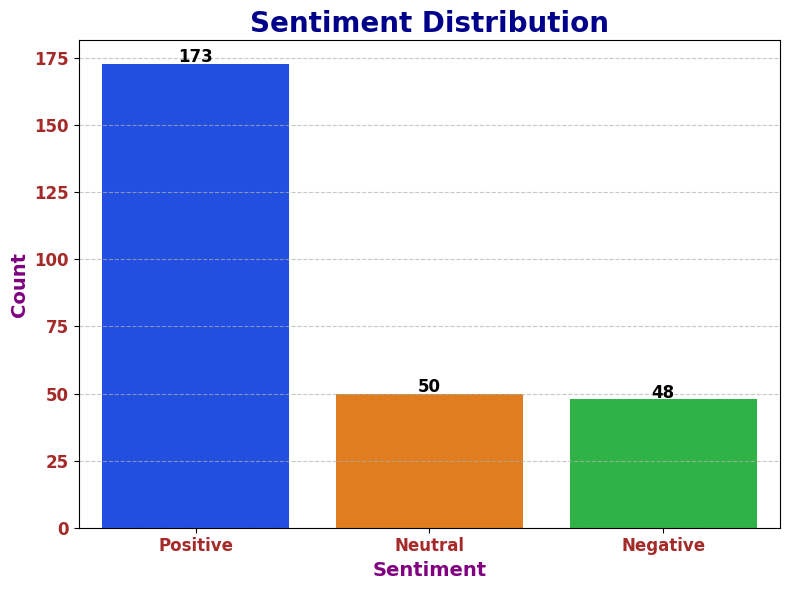

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment category
sentiment_counts = results_df['Sentiment'].value_counts()

# Set a custom color palette
colors = sns.color_palette("bright", len(sentiment_counts))

# Create a bar plot
plt.figure(figsize=(8, 6))  # Set figure size
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    palette=colors
)

# Add value annotations on each bar
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=12, fontweight='bold', color='black')

# Add labels and title
plt.title("Sentiment Distribution", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Sentiment", fontsize=14, fontweight='bold', color='purple')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='purple')

# Customize axis ticks and grid
plt.xticks(fontsize=12, fontweight='bold', color='brown')
plt.yticks(fontsize=12, fontweight='bold', color='brown')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Word cloud

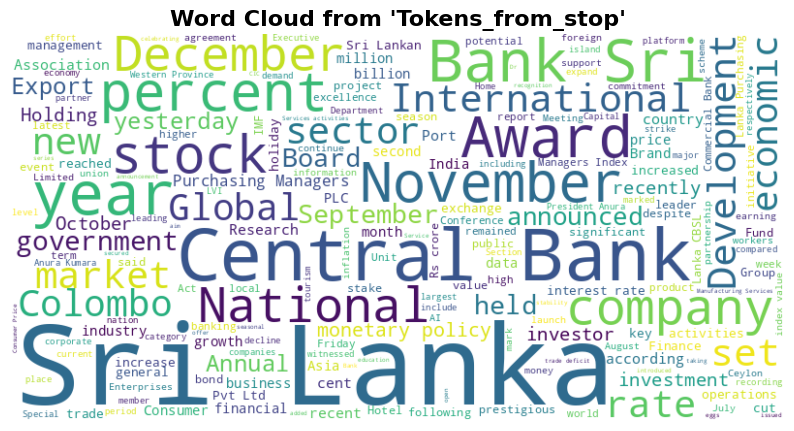

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the lists in 'Tokens_from_stop' column and combine into a single string
text_data = " ".join([" ".join(tokens) if isinstance(tokens, list) else tokens for tokens in df['Tokens_from_stop']])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from 'Tokens_from_stop'", fontsize=16, fontweight='bold')
plt.show()


Topic modeling

In [ ]:
import pandas as pd
import spacy
from gensim import corpora, models
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords
nltk.download('stopwords')

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Stop words
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    # Tokenize, remove stopwords and non-alphanumeric tokens
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return [word for word in tokens if word.isalnum() and word not in stop_words]

# Apply preprocessing to the Paragraph Text column
df['Processed Text'] = df['Paragraph Text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Create a dictionary and a corpus for the LDA model
dictionary = corpora.Dictionary(df['Processed Text'])
corpus = [dictionary.doc2bow(text) for text in df['Processed Text']]


In [ ]:
# Number of topics to extract
num_topics = 5

# Train the LDA model
lda_model = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    per_word_topics=True
)

# Display the topics and keywords
print("Extracted Topics:")
topics = lda_model.print_topics(num_words=10)
for topic_num, topic_keywords in topics:
    print(f"Topic {topic_num + 1}: {topic_keywords}")


Extracted Topics:
Topic 1: 0.018*"sri" + 0.017*"lanka" + 0.011*"2024" + 0.008*"bank" + 0.006*"trade" + 0.005*"central" + 0.005*"price" + 0.005*"november" + 0.004*"take" + 0.004*"launch"
Topic 2: 0.012*"sri" + 0.008*"lanka" + 0.008*"increase" + 0.006*"market" + 0.005*"cent" + 0.005*"colombo" + 0.004*"curve" + 0.004*"company" + 0.004*"percent" + 0.004*"hotel"
Topic 3: 0.029*"sri" + 0.022*"lanka" + 0.017*"2024" + 0.013*"index" + 0.010*"bank" + 0.007*"award" + 0.007*"central" + 0.006*"lankas" + 0.006*"activity" + 0.006*"manufacturing"
Topic 4: 0.015*"sri" + 0.012*"bank" + 0.007*"stock" + 0.007*"year" + 0.007*"lankas" + 0.006*"lanka" + 0.006*"percent" + 0.005*"2024" + 0.005*"national" + 0.005*"mark"
Topic 5: 0.015*"policy" + 0.014*"bank" + 0.011*"central" + 0.010*"rate" + 0.008*"2024" + 0.008*"monetary" + 0.008*"sri" + 0.005*"market" + 0.005*"lanka" + 0.005*"board"


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=df['Processed Text'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"\nCoherence Score: {coherence_score:.2f}")



Coherence Score: 0.32


In [ ]:
df

,Paragraph Text,Tokens,Cleaned Text,Tokens_from_stop,Lemmatized Text,Bigrams,Trigrams,POS Tags,Named Entities,Processed Text
0,Macksons Minerals Polymers Pvt Ltd a subsidia...,"[Macksons, Minerals, , Polymers, Pvt, Ltd, a,...",Macksons Minerals Polymers Pvt Ltd subsidiar...,"[Macksons, Minerals, , Polymers, Pvt, Ltd, s...",Macksons Minerals Polymers Pvt Ltd subsidiar...,"[Macksons Minerals, Minerals Polymers, Polymer...","[Macksons Minerals Polymers, Minerals Polymers...","[(Macksons, PROPN), (Minerals, PROPN), ( , SP...","[(Macksons Minerals Polymers Pvt Ltd, ORG), ...","[mackson, mineral, polymer, pvt, ltd, subsidia..."
1,The IMF is reviewing recent tax revision annou...,"[The, IMF, is, reviewing, recent, tax, revisio...",IMF reviewing recent tax revision announcement...,"[IMF, reviewing, recent, tax, revision, announ...",IMF review recent tax revision announcement Sr...,"[IMF reviewing, reviewing recent, recent tax, ...","[IMF reviewing recent, reviewing recent tax, r...","[(IMF, PROPN), (reviewing, VERB), (recent, ADJ...","[(IMF, ORG), (Sri Lankas, GPE), (Executive Boa...","[imf, review, recent, tax, revision, announcem..."
2,The Central Bank of Sri Lanka CBSL has taken p...,"[The, Central, Bank, of, Sri, Lanka, CBSL, has...",Central Bank Sri Lanka CBSL taken proactive me...,"[Central, Bank, Sri, Lanka, CBSL, taken, proac...",Central Bank Sri Lanka CBSL take proactive mea...,"[Central Bank, Bank Sri, Sri Lanka, Lanka CBSL...","[Central Bank Sri, Bank Sri Lanka, Sri Lanka C...","[(Central, PROPN), (Bank, PROPN), (Sri, PROPN)...","[(Central Bank, ORG), (Section 83C3, LAW)]","[central, bank, sri, lanka, cbsl, take, proact..."
3,Divasa Pharma Limited providing factual clarit...,"[Divasa, Pharma, Limited, providing, factual, ...",Divasa Pharma Limited providing factual clarit...,"[Divasa, Pharma, Limited, providing, factual, ...",Divasa Pharma Limited provide factual clarity ...,"[Divasa Pharma, Pharma Limited, Limited provid...","[Divasa Pharma Limited, Pharma Limited providi...","[(Divasa, PROPN), (Pharma, PROPN), (Limited, P...","[(Divasa Pharma Limited, ORG), (National Medic...","[divasa, pharma, limit, provide, factual, clar..."
4,Latest launches include the new Zenbook S 14 a...,"[Latest, launches, include, the, new, Zenbook,...",Latest launches include new Zenbook S 14 TUF G...,"[Latest, launches, include, new, Zenbook, S, 1...",late launch include new Zenbook S 14 TUF Gamin...,"[Latest launches, launches include, include ne...","[Latest launches include, launches include new...","[(Latest, ADJ), (launches, NOUN), (include, VE...","[(Zenbook S, PERSON), (14, CARDINAL), (A16, PR...","[late, launch, include, new, zenbook, 14, tuf,..."
...,...,...,...,...,...,...,...,...,...,...
266,Prominent investor Mukul Mahavir Agrawals port...,"[Prominent, investor, Mukul, Mahavir, Agrawals...",Prominent investor Mukul Mahavir Agrawals port...,"[Prominent, investor, Mukul, Mahavir, Agrawals...",prominent investor Mukul Mahavir Agrawals port...,"[Prominent investor, investor Mukul, Mukul Mah...","[Prominent investor Mukul, investor Mukul Maha...","[(Prominent, ADJ), (investor, NOUN), (Mukul, P...","[(Mukul Mahavir, PERSON), (56, CARDINAL), (Dec...","[prominent, investor, mukul, mahavir, agrawals..."
267,Restaurant Brands Asia Ltd formerly known as B...,"[Restaurant, Brands, Asia, Ltd, formerly, know...",Restaurant Brands Asia Ltd known Burger King I...,"[Restaurant, Brands, Asia, Ltd, known, Burger,...",Restaurant Brands Asia Ltd know Burger King In...,"[Restaurant Brands, Brands Asia, Asia Ltd, Ltd...","[Restaurant Brands Asia, Brands Asia Ltd, Asia...","[(Restaurant, PROPN), (Brands, PROPN), (Asia, ...","[(Restaurant Brands Asia Ltd, ORG), (Burger Ki...","[restaurant, brands, asia, ltd, know, burger, ..."
268,NRIs investing in India should avoid common mi...,"[NRIs, investing, in, India, should, avoid, co...",NRIs investing India avoid common mistakes lik...,"[NRIs, investing, India, avoid, common, mistak...",nri invest India avoid co

Stylometric Analysis and Visualization

TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the processed text back into a string for vectorization
df['Processed Text'] = df['Processed Text'].apply(lambda x: ' '.join(x))

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the text data to get the TF-IDF matrix
X = vectorizer.fit_transform(df['Processed Text'])

# Convert to a DataFrame for easier manipulation
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [ ]:
df['Sentiment']=results_df['Sentiment']

 PCA for Dimensionality Reduction

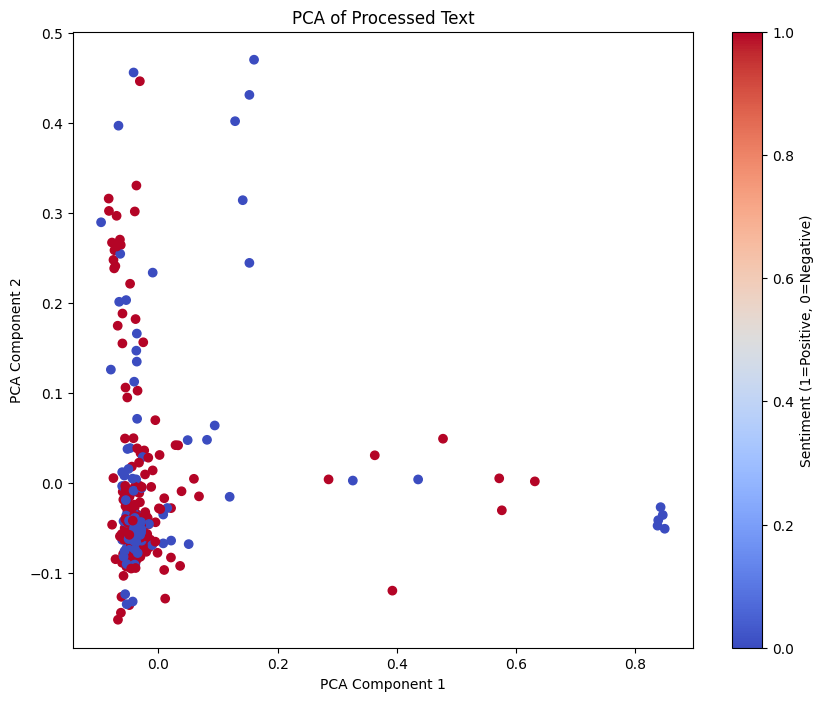

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_df)

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0), cmap='coolwarm')
plt.title('PCA of Processed Text')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Sentiment (1=Positive, 0=Negative)')
plt.show()


K-Means Clustering

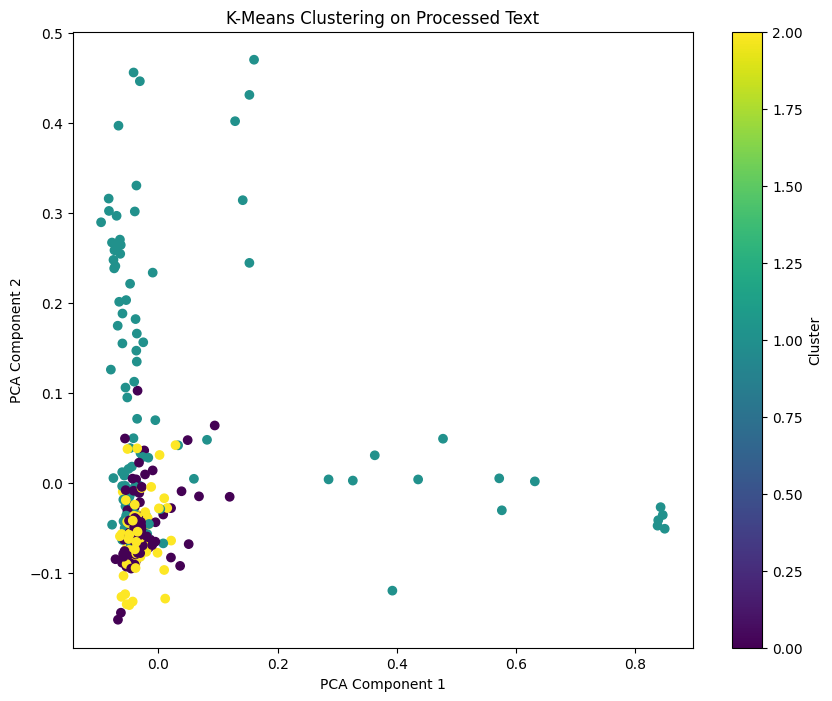

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
df['Cluster'] = kmeans.fit_predict(tfidf_df)

# Plot the PCA result with cluster labels
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering on Processed Text')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


Dendrogram Visualization (Hierarchical Clustering)

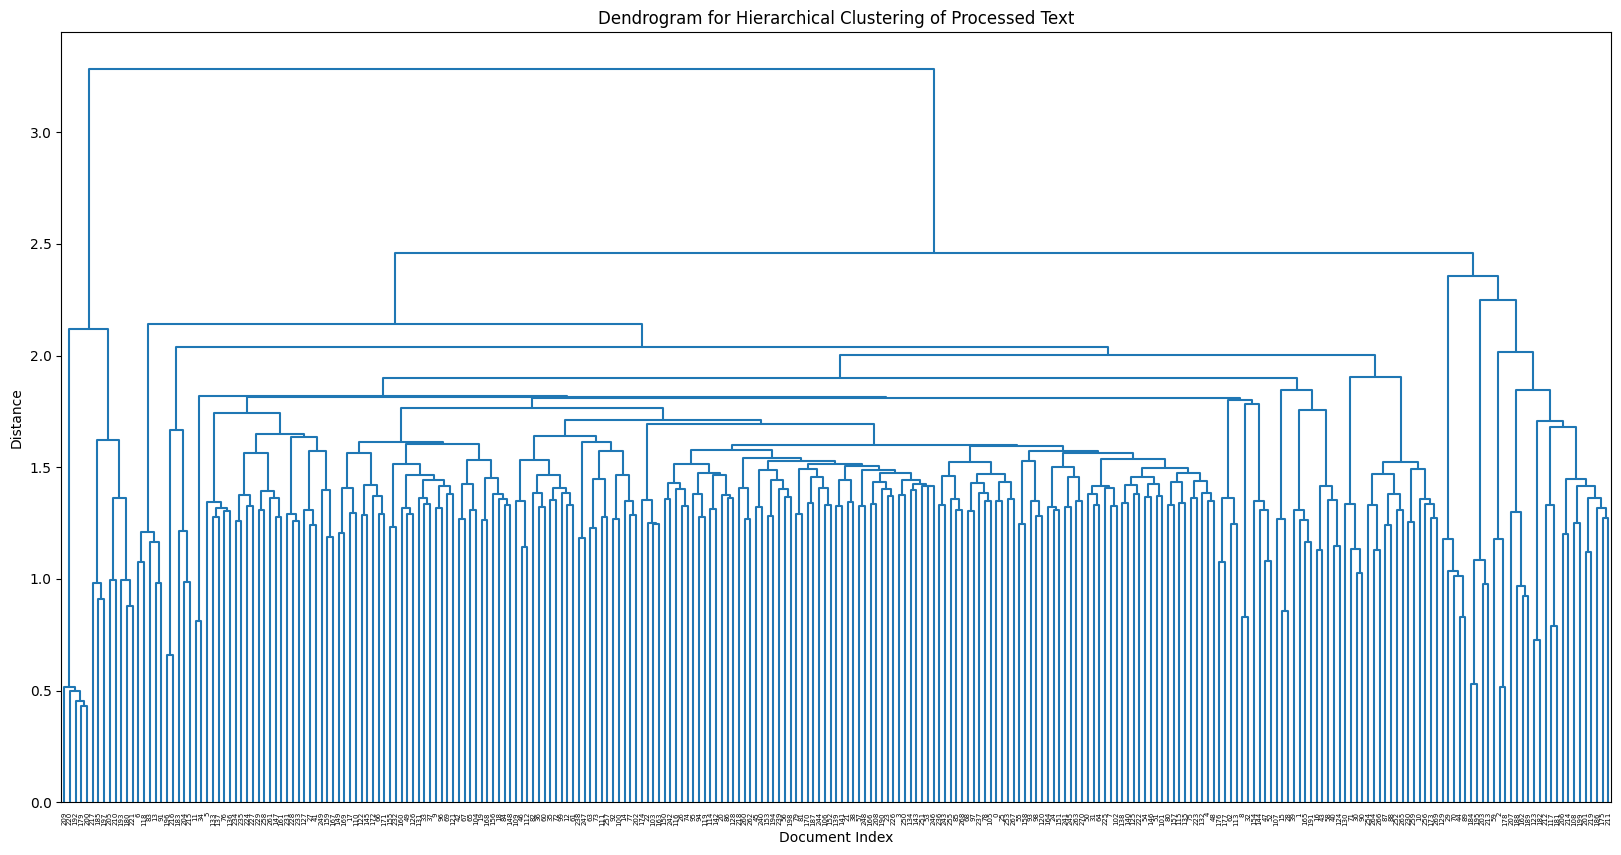

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(tfidf_df, method='ward')

# Create a dendrogram
plt.figure(figsize=(20, 10))
dendrogram(Z, labels=df.index, orientation='top', color_threshold=0)
plt.title('Dendrogram for Hierarchical Clustering of Processed Text')
plt.xlabel('Document Index')
plt.ylabel('Distance')
plt.show()


 Document Clustering with Word2Vec or Doc2Vec

In [ ]:
!pip install gensim


 Doc2Vec

In [ ]:
import nltk
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from gensim.models.doc2vec import TaggedDocument

# Assuming `df['Processed Text']` is the column with tokenized and cleaned text
corpus = [TaggedDocument(words=text, tags=[str(i)]) for i, text in enumerate(df['Processed Text'])]


In [ ]:
from gensim.models import Doc2Vec

model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=20)
model.build_vocab(corpus)
model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)


In [ ]:
import pandas as pd
import spacy
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load SpaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Stop words
stop_words = set(stopwords.words('english'))

import pandas as pd
import spacy
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load SpaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Stop words
stop_words = set(stopwords.words('english'))

# Preprocessing function to clean and tokenize the text
def preprocess_text(text):
    # Tokenize, remove stopwords and non-alphanumeric tokens, and lemmatize
    doc = nlp(text.lower())  # Lemmatize the text using SpaCy
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return [word for word in tokens if word.isalnum() and word not in stop_words]

# Apply preprocessing to the 'Paragraph Text' column
df['Processed Text'] = df['Paragraph Text'].apply(preprocess_text)

# Convert the processed text into TaggedDocument format
corpus = [TaggedDocument(words=text, tags=[str(i)]) for i, text in enumerate(df['Processed Text'])]

# Train the Doc2Vec model
model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=20)

# Build vocabulary from the corpus
model.build_vocab(corpus)

# Train the model on the corpus
model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)

# Example of how to access vector representations for all documents
# You can get the vector for each document using model.dv[tag]
vectors = {str(i): model.dv[str(i)] for i in range(len(df))}

# Optionally, you can print the vector for a specific document
# For example, to print the vector of the first document:
print(f"Vector representation of the first document: {vectors['0']}")

# To perform clustering or similarity analysis, you can now use the vectors
# For example, checking similarity between the first and second document
similarity = model.dv['0'] == model.dv['1']  # Optional: comparing the first and second document
print(f"Similarity between first and second document: {similarity}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vector representation of the first document: [-0.01383743  0.02397168  0.02492908 -0.00879806 -0.00909773 -0.07188066
 -0.00075398  0.06966428 -0.08446724 -0.01811645 -0.03867896 -0.06595895
 -0.00041912 -0.01775563 -0.00584925 -0.06589808  0.05370874 -0.01467814
  0.0149674  -0.08906665 -0.00363977  0.00288124  0.02660232  0.02464125
  0.00203187  0.01762624 -0.05420228 -0.03906544 -0.07933864 -0.03028494
  0.06989148  0.05501112 -0.00635524  0.03174324  0.02310412  0.04343668
 -0.03072309 -0.05305834 -0.00778294 -0.03862561 -0.00405438 -0.02663637
 -0.02116076 -0.05784422  0.01255789 -0.00822643 -0.00705103  0.00066466
  0.00480674  0.02694453 -0.01563211 -0.01329869 -0.00158933 -0.02765353
 -0.01279647  0.05691265  0.0197908  -0.01737049 -0.05473342  0.02796515
  0.027119    0.05595918 -0.02883389  0.02877507 -0.02442511  0.07322493
  0.02151978  0.02798831 -0.02308073  0.03090843 -0.0593335  -0.00877531
  0.0515182  -0.01943002  0.05825203  0.01351209  0.03033613 -0.0081424
 -0.022

In [ ]:
df

,Paragraph Text,Tokens,Cleaned Text,Tokens_from_stop,Lemmatized Text,Bigrams,Trigrams,POS Tags,Named Entities,Processed Text,Sentiment,Cluster
0,Macksons Minerals Polymers Pvt Ltd a subsidia...,"[Macksons, Minerals, , Polymers, Pvt, Ltd, a,...",Macksons Minerals Polymers Pvt Ltd subsidiar...,"[Macksons, Minerals, , Polymers, Pvt, Ltd, s...",Macksons Minerals Polymers Pvt Ltd subsidiar...,"[Macksons Minerals, Minerals Polymers, Polymer...","[Macksons Minerals Polymers, Minerals Polymers...","[(Macksons, PROPN), (Minerals, PROPN), ( , SP...","[(Macksons Minerals Polymers Pvt Ltd, ORG), ...","[mackson, mineral, polymer, pvt, ltd, subsidia...",Positive,2
1,The IMF is reviewing recent tax revision annou...,"[The, IMF, is, reviewing, recent, tax, revisio...",IMF reviewing recent tax revision announcement...,"[IMF, reviewing, recent, tax, revision, announ...",IMF review recent tax revision announcement Sr...,"[IMF reviewing, reviewing recent, recent tax, ...","[IMF reviewing recent, reviewing recent tax, r...","[(IMF, PROPN), (reviewing, VERB), (recent, ADJ...","[(IMF, ORG), (Sri Lankas, GPE), (Executive Boa...","[imf, review, recent, tax, revision, announcem...",Positive,1
2,The Central Bank of Sri Lanka CBSL has taken p...,"[The, Central, Bank, of, Sri, Lanka, CBSL, has...",Central Bank Sri Lanka CBSL taken proactive me...,"[Central, Bank, Sri, Lanka, CBSL, taken, proac...",Central Bank Sri Lanka CBSL take proactive mea...,"[Central Bank, Bank Sri, Sri Lanka, Lanka CBSL...","[Central Bank Sri, Bank Sri Lanka, Sri Lanka C...","[(Central, PROPN), (Bank, PROPN), (Sri, PROPN)...","[(Central Bank, ORG), (Section 83C3, LAW)]","[central, bank, sri, lanka, cbsl, take, proact...",Positive,1
3,Divasa Pharma Limited providing factual clarit...,"[Divasa, Pharma, Limited, providing, factual, ...",Divasa Pharma Limited providing factual clarit...,"[Divasa, Pharma, Limited, providing, factual, ...",Divasa Pharma Limited provide factual clarity ...,"[Divasa Pharma, Pharma Limited, Limited provid...","[Divasa Pharma Limited, Pharma Limited providi...","[(Divasa, PROPN), (Pharma, PROPN), (Limited, P...","[(Divasa Pharma Limited, ORG), (National Medic...","[divasa, pharma, limit, provide, factual, clar...",Positive,2
4,Latest launches include the new Zenbook S 14 a...,"[Latest, launches, include, the, new, Zenbook,...",Latest launches include new Zenbook S 14 TUF G...,"[Latest, launches, include, new, Zenbook, S, 1...",late launch include new Zenbook S 14 TUF Gamin...,"[Latest launches, launches include, include ne...","[Latest launches include, launches include new...","[(Latest, ADJ), (launches, NOUN), (include, VE...","[(Zenbook S, PERSON), (14, CARDINAL), (A16, PR...","[late, launch, include, new, zenbook, 14, tuf,...",Neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...
266,Prominent investor Mukul Mahavir Agrawals port...,"[Prominent, investor, Mukul, Mahavir, Agrawals...",Prominent investor Mukul Mahavir Agrawals port...,"[Prominent, investor, Mukul, Mahavir, Agrawals...",prominent investor Mukul Mahavir Agrawals port...,"[Prominent investor, investor Mukul, Mukul Mah...","[Prominent investor Mukul, investor Mukul Maha...","[(Prominent, ADJ), (investor, NOUN), (Mukul, P...","[(Mukul Mahavir, PERSON), (56, CARDINAL), (Dec...","[prominent, investor, mukul, mahavir, agrawals...",Positive,2
267,Restaurant Brands Asia Ltd formerly known as B...,"[Restaurant, Brands, Asia, Ltd, formerly, know...",Restaurant Brands Asia Ltd known Burger King I...,"[Restaurant, Brands, Asia, Ltd, known, Burger,...",Restaurant Brands Asia Ltd know Burger King In...,"[Restaurant Brands, Brands Asia, Asia Ltd, Ltd...","[Restaurant Brands Asia, Brands Asia Ltd, Asia...","[(Restaurant, PROPN), (Brands, PROPN), (Asia, ...","[(Restaurant Brands Asia Ltd, ORG), (Burger Ki...","[restaurant, brands, asia, ltd, know, burger, ...",Positive,2
268,NRIs investing in India should avoid common mi...,"[NRIs, investing, in, India, should, avoid, co...",NRIs investing India avoi

Apply K-Means Clustering

In [ ]:
doc_vectors = [model.infer_vector(doc.split()) for doc in df['Paragraph Text']]


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Convert list of document vectors to a numpy array
X = np.array(doc_vectors)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
df['Cluster'] = kmeans.fit_predict(X)

# Display the first few rows with cluster labels
print(df[['Paragraph Text', 'Cluster']].head())


                                      Paragraph Text  Cluster
0  Macksons Minerals  Polymers Pvt Ltd a subsidia...        2
1  The IMF is reviewing recent tax revision annou...        2
2  The Central Bank of Sri Lanka CBSL has taken p...        0
3  Divasa Pharma Limited providing factual clarit...        2
4  Latest launches include the new Zenbook S 14 a...        2


Visualize the Clusters Using PCA

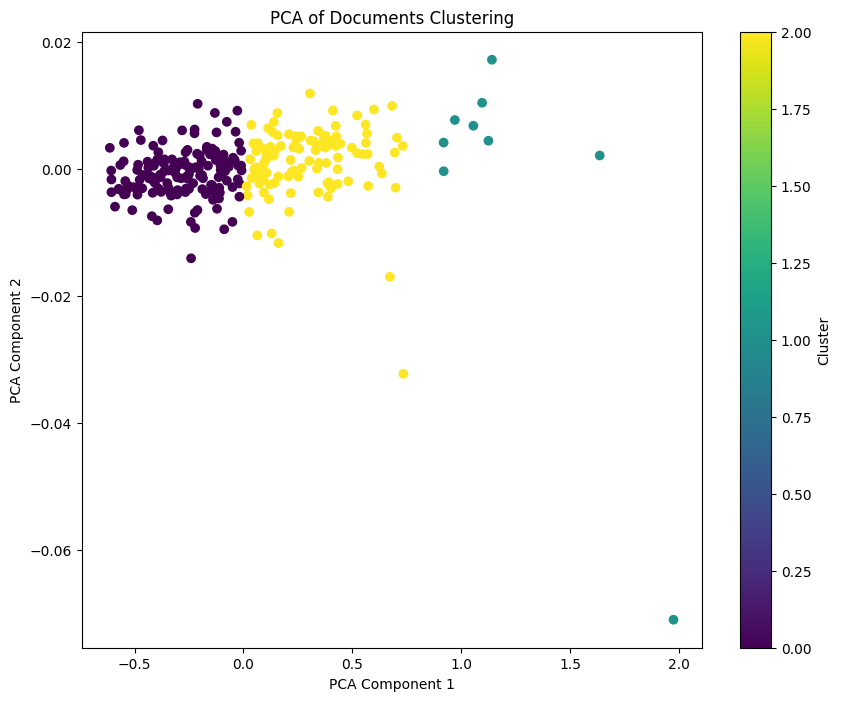

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('PCA of Documents Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


t-SNE Visualization

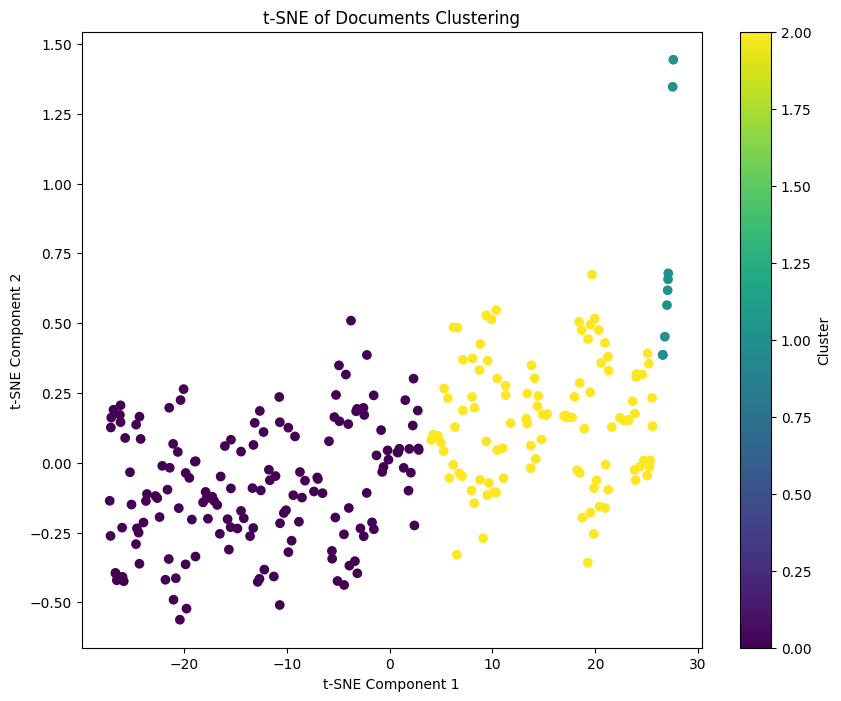

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE for further dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('t-SNE of Documents Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()


Dependency Parsing and Advanced Structures

In [ ]:
import spacy
import pandas as pd
from spacy import displacy

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Assuming your DataFrame is 'df' and the 'Processed Text' column contains the text to be parsed
# Parse the first few rows for analysis
sample_texts = df['Processed Text'].head(5)  # You can adjust the number of rows to sample

# Perform dependency parsing for each sentence (ensure text is passed as a string)
parsed_sentences = [nlp(str(text)) for text in sample_texts]

# Visualize the dependency parsing using displacy
for idx, parsed_doc in enumerate(parsed_sentences):
    print(f"Sentence {idx + 1}: {sample_texts.iloc[idx]}")
    displacy.render(parsed_doc, style='dep', jupyter=True)

# If you want to save the visualizations to HTML files
for idx, parsed_doc in enumerate(parsed_sentences):
    displacy.render(parsed_doc, style='dep', page=True, jupyter=False)
    with open(f"parsed_sentence_{idx + 1}.html", "w") as f:
        f.write(displacy.render(parsed_doc, style='dep', page=True, jupyter=False))



Sentence 1: ['mackson', 'mineral', 'polymer', 'pvt', 'ltd', 'subsidiary', 'mackson', 'holding', 'sign', 'agreement', 'worth', 'u', '17', 'million', 'board', 'investment', 'company', 'initiate', 'ambitious', 'program', 'construct', 'stateoftheart', 'processing', 'plant', 'aim', 'enhance', 'value', 'locally', 'source', 'mineral', 'facility', 'produce', 'ultrafine', 'ground', 'calcium']


Sentence 2: ['imf', 'review', 'recent', 'tax', 'revision', 'announcement', 'sri', 'lankas', 'president', 'plan', 'provide', 'detailed', 'assessment', 'staff', 'report', 'follow', 'executive', 'board', 'approval', 'extended', 'fund', 'facility', 'eff', 'speak', 'press', 'briefing', 'thursday', '19', 'julie', 'kozack', 'director', 'imfs', 'communications', 'department', 'state']


Sentence 3: ['central', 'bank', 'sri', 'lanka', 'cbsl', 'take', 'proactive', 'measure', 'address', 'alarming', 'increase', 'prohibit', 'scheme', 'pose', 'risk', 'financial', 'system', 'stability', 'protection', 'general', 'public', 'scheme', 'initiative', 'include', 'conduct', 'investigation', 'section', '83c3', 'banking', 'act', 'determine', 'individual', 'entity']


Sentence 4: ['divasa', 'pharma', 'limit', 'provide', 'factual', 'clarity', 'recent', 'allegation', 'parliament', 'say', 'company', 'issue', 'license', 'sell', 'medicine', 'wholesale', 'national', 'medicine', 'regulatory', 'authority', 'nmra', '18', 'august', '2018', 'continuously', 'renew', 'date', 'accordingly', 'divasa', 'pharma', 'ltd', 'local', 'authorize', 'distributor', 'george', 'steuart']


Sentence 5: ['late', 'launch', 'include', 'new', 'zenbook', '14', 'tuf', 'game', 'a16', 'new', 'launch', 'offer', 'enrich', 'suite', 'copilot', 'pc', 'experience', 'asus', 'announce', 'launch', 'new', 'laptop', 'model', 'zenbook', '14', 'power', 'late', 'intel', 'core', 'ultra', 'processor', 'series', '2', 'amd', 'ai', '300', 'seriespowere', 'tuf', 'game', 'a16', 'feature', 'integrate', 'npu']


In [ ]:
df

,Paragraph Text,Tokens,Cleaned Text,Tokens_from_stop,Lemmatized Text,Bigrams,Trigrams,POS Tags,Named Entities,Processed Text,Sentiment,Cluster
0,Macksons Minerals Polymers Pvt Ltd a subsidia...,"[Macksons, Minerals, , Polymers, Pvt, Ltd, a,...",Macksons Minerals Polymers Pvt Ltd subsidiar...,"[Macksons, Minerals, , Polymers, Pvt, Ltd, s...",Macksons Minerals Polymers Pvt Ltd subsidiar...,"[Macksons Minerals, Minerals Polymers, Polymer...","[Macksons Minerals Polymers, Minerals Polymers...","[(Macksons, PROPN), (Minerals, PROPN), ( , SP...","[(Macksons Minerals Polymers Pvt Ltd, ORG), ...","[mackson, mineral, polymer, pvt, ltd, subsidia...",Positive,2
1,The IMF is reviewing recent tax revision annou...,"[The, IMF, is, reviewing, recent, tax, revisio...",IMF reviewing recent tax revision announcement...,"[IMF, reviewing, recent, tax, revision, announ...",IMF review recent tax revision announcement Sr...,"[IMF reviewing, reviewing recent, recent tax, ...","[IMF reviewing recent, reviewing recent tax, r...","[(IMF, PROPN), (reviewing, VERB), (recent, ADJ...","[(IMF, ORG), (Sri Lankas, GPE), (Executive Boa...","[imf, review, recent, tax, revision, announcem...",Positive,2
2,The Central Bank of Sri Lanka CBSL has taken p...,"[The, Central, Bank, of, Sri, Lanka, CBSL, has...",Central Bank Sri Lanka CBSL taken proactive me...,"[Central, Bank, Sri, Lanka, CBSL, taken, proac...",Central Bank Sri Lanka CBSL take proactive mea...,"[Central Bank, Bank Sri, Sri Lanka, Lanka CBSL...","[Central Bank Sri, Bank Sri Lanka, Sri Lanka C...","[(Central, PROPN), (Bank, PROPN), (Sri, PROPN)...","[(Central Bank, ORG), (Section 83C3, LAW)]","[central, bank, sri, lanka, cbsl, take, proact...",Positive,0
3,Divasa Pharma Limited providing factual clarit...,"[Divasa, Pharma, Limited, providing, factual, ...",Divasa Pharma Limited providing factual clarit...,"[Divasa, Pharma, Limited, providing, factual, ...",Divasa Pharma Limited provide factual clarity ...,"[Divasa Pharma, Pharma Limited, Limited provid...","[Divasa Pharma Limited, Pharma Limited providi...","[(Divasa, PROPN), (Pharma, PROPN), (Limited, P...","[(Divasa Pharma Limited, ORG), (National Medic...","[divasa, pharma, limit, provide, factual, clar...",Positive,2
4,Latest launches include the new Zenbook S 14 a...,"[Latest, launches, include, the, new, Zenbook,...",Latest launches include new Zenbook S 14 TUF G...,"[Latest, launches, include, new, Zenbook, S, 1...",late launch include new Zenbook S 14 TUF Gamin...,"[Latest launches, launches include, include ne...","[Latest launches include, launches include new...","[(Latest, ADJ), (launches, NOUN), (include, VE...","[(Zenbook S, PERSON), (14, CARDINAL), (A16, PR...","[late, launch, include, new, zenbook, 14, tuf,...",Neutral,2
...,...,...,...,...,...,...,...,...,...,...,...,...
266,Prominent investor Mukul Mahavir Agrawals port...,"[Prominent, investor, Mukul, Mahavir, Agrawals...",Prominent investor Mukul Mahavir Agrawals port...,"[Prominent, investor, Mukul, Mahavir, Agrawals...",prominent investor Mukul Mahavir Agrawals port...,"[Prominent investor, investor Mukul, Mukul Mah...","[Prominent investor Mukul, investor Mukul Maha...","[(Prominent, ADJ), (investor, NOUN), (Mukul, P...","[(Mukul Mahavir, PERSON), (56, CARDINAL), (Dec...","[prominent, investor, mukul, mahavir, agrawals...",Positive,1
267,Restaurant Brands Asia Ltd formerly known as B...,"[Restaurant, Brands, Asia, Ltd, formerly, know...",Restaurant Brands Asia Ltd known Burger King I...,"[Restaurant, Brands, Asia, Ltd, known, Burger,...",Restaurant Brands Asia Ltd know Burger King In...,"[Restaurant Brands, Brands Asia, Asia Ltd, Ltd...","[Restaurant Brands Asia, Brands Asia Ltd, Asia...","[(Restaurant, PROPN), (Brands, PROPN), (Asia, ...","[(Restaurant Brands Asia Ltd, ORG), (Burger Ki...","[restaurant, brands, asia, ltd, know, burger, ...",Positive,0
268,NRIs investing in India should avoid common mi...,"[NRIs, investing, in, India, should, avoid, co...",NRIs investing India avoi

summerization

In [ ]:
# Print the column names of your DataFrame
print(df.columns)


Index(['Paragraph Text', 'Tokens', 'Cleaned Text', 'Tokens_from_stop',
       'Lemmatized Text', 'Bigrams', 'Trigrams', 'POS Tags', 'Named Entities',
       'Processed Text', 'Sentiment', 'Cluster'],
      dtype='object')


In [ ]:
import spacy
import pandas as pd

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Initialize the relevant verbs list
relevant_verbs = {
    "boost", "win", "achieve", "announce", "grow", "expand", "raise", "reduce", "improve",
    "ranked", "increase", "gain", "surge", "lead", "dominate", "outperform", "capitalize",
    "invest", "strengthen", "transform", "optimize", "target", "secure", "partner", "introduce",
    "accelerate", "improve", "strengthen", "expand"
}

# Function to generate a short summary for each paragraph text
def summarize_paragraph(text):
    doc = nlp(text)

    summary = []
    for ent in doc.ents:
        if ent.label_ in {"ORG", "GPE", "EVENT"}:  # Focus on organizations, geopolitical entities, and events
            summary.append(ent.text)

    # Extract relevant verbs
    actions = [token.lemma_ for token in doc if token.pos_ in {"VERB"} and token.lemma_ in relevant_verbs]

    if actions:
        summary.extend(actions)

    # Combine all important entities and actions into a summary
    return " ".join(summary) if summary else text

# Apply the summarization function to the 'Paragraph Text' column
summarized_texts = df['Paragraph Text'].apply(summarize_paragraph)

# Create a new DataFrame for summarized data
summarized_df = pd.DataFrame({
    'Original Text': df['Paragraph Text'],
    'Summarized Text': summarized_texts
})

# Display the summarized DataFrame
summarized_df


,Original Text,Summarized Text
0,Macksons Minerals Polymers Pvt Ltd a subsidia...,Macksons Minerals Polymers Pvt Ltd Macksons H...
1,The IMF is reviewing recent tax revision annou...,IMF Sri Lankas Executive Board the Extended Fu...
2,The Central Bank of Sri Lanka CBSL has taken p...,The Central Bank of
3,Divasa Pharma Limited providing factual clarit...,Divasa Pharma Limited the National Medicines R...
4,Latest launches include the new Zenbook S 14 a...,Copilot Intel NPU announce
...,...,...
266,Prominent investor Mukul Mahavir Agrawals port...,ETMarkets Mukul Agrawals the September 2024 qu...
267,Restaurant Brands Asia Ltd formerly known as B...,Restaurant Brands Asia Ltd Burger King India
268,NRIs investing in India should avoid common mi...,India KYC TIN invest optimize
269,Stock Market Crash Today Indian stock markets ...,the US Federal Reserves The Sensex and Nifty US


summury for the investor

In [ ]:
import spacy
from termcolor import colored

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Expanded relevant verbs list to cover more meaningful business actions
relevant_verbs = {
    "boost", "win", "achieve", "announce", "grow", "expand", "raise", "reduce", "improve",
    "ranked", "increase", "gain", "surge", "lead", "dominate", "outperform", "capitalize",
    "invest", "strengthen", "transform", "optimize", "target", "secure", "partner", "introduce",
    "accelerate", "improve", "strengthen", "expand"
}

# Function to generate a colorful, polished, and user-friendly summary
def generate_colored_summary(df):
    summary_sentences = []

    for _, row in df.iterrows():
        text = row['Cleaned Text']
        sentiment = row['Sentiment']
        cluster = row['Cluster']

        doc = nlp(text)

        # Iterate over named entities and process actions
        for ent in doc.ents:
            if ent.label_ in {"ORG", "GPE", "EVENT"}:  # Focus on organizations, geopolitical entities, and events
                # Extract relevant actions (verbs/nouns)
                actions = [token.lemma_ for token in ent.root.head.sent if token.pos_ in {"VERB", "NOUN"} and token.lemma_ in relevant_verbs]

                if actions:
                    # Highlight organization names in blue
                    highlighted_entity = colored(f"[{ent.text.upper()}]", 'blue', attrs=['bold'])

                    # Initialize the action summary
                    action_summary = []

                    # Highlight verbs based on sentiment (positive or negative)
                    for action in actions:
                        if action in {"boost", "win", "achieve", "grow", "expand", "increase", "gain", "improve", "surge", "lead", "dominate", "outperform"}:
                            action_summary.append(colored(action, 'green'))  # Positive verbs in green
                        elif action in {"reduce", "decline", "drop", "fail", "cut"}:
                            action_summary.append(colored(action, 'red'))  # Negative verbs in red
                        else:
                            action_summary.append(action)  # Neutral verbs without highlighting

                    # Create action summary string
                    action_summary_str = f"{highlighted_entity} {' '.join(action_summary)}."

                    # Add sentiment information
                    sentiment_color = 'green' if sentiment.lower() == 'positive' else ('red' if sentiment.lower() == 'negative' else 'yellow')
                    sentiment_display = colored(f"Sentiment: {sentiment.capitalize()}", sentiment_color)

                    # Build the final sentence with cluster label
                    cluster_label = colored(f"Cluster {cluster}", 'magenta')
                    summary = f"{cluster_label}: {action_summary_str} {sentiment_display}"
                    summary_sentences.append(summary)

    return summary_sentences

# Apply the function to your DataFrame
colored_summary_sentences = generate_colored_summary(df)

# Print the polished output with added consultation
print(colored("Improved Business Sector Summary (User-Friendly):", 'yellow', attrs=['bold']))
for sentence in colored_summary_sentences:
    print(sentence)
    print("=" * 80)  # Adding a separator for readability

# Consultation message (can be expanded based on the analysis)
def provide_investment_consultation(df):
    overall_sentiment = df['Sentiment'].value_counts()
    positive_count = overall_sentiment.get('Positive', 0)
    negative_count = overall_sentiment.get('Negative', 0)

    if positive_count > negative_count:
        consultation = "Overall, the market sentiment is positive. Investors may consider capitalizing on opportunities with growing organizations."
    elif negative_count > positive_count:
        consultation = "The market sentiment seems to be more negative, indicating potential caution. It may be wise to monitor trends carefully."
    else:
        consultation = "The market sentiment is neutral. Investors should continue to observe the market closely for any significant shifts."

    return colored(consultation, 'blue', attrs=['bold'])

# Provide a brief investment consultation
print(provide_investment_consultation(df))


Improved Business Sector Summary (User-Friendly):
Cluster 0: [CENTRAL BANK] increase. Sentiment: Positive
Cluster 2: [COPILOT] announce. Sentiment: Neutral
Cluster 2: [ASUS] announce. Sentiment: Neutral
Cluster 2: [INTEL] announce. Sentiment: Neutral
Cluster 2: [NPU] announce. Sentiment: Neutral
Cluster 0: [OXFORD COLLEGE BUSINESS] grow secure. Sentiment: Positive
Cluster 2: [BALMORAL HALL KINGSBURY HOTEL COLOMBO] partner. Sentiment: Positive
Cluster 2: [KASPERSKY] partner. Sentiment: Positive
Cluster 2: [INSIGHTEDGE] increase. Sentiment: Positive
Cluster 2: [CIC] introduce. Sentiment: Positive
Cluster 2: [FED] introduce. Sentiment: Positive
Cluster 2: [DIET FREE] introduce. Sentiment: Positive
Cluster 2: [PAYMEDIA] achieve win. Sentiment: Positive
Cluster 2: [RUNNERUP ASIA PACIFIC ICT ALLIANCE APICTA AWARDS 2024] achieve win. Sentiment: Positive
Cluster 2: [COMMUNITY INDIGENOUS SERVICES] achieve win. Sentiment: Positive
Cluster 2: [LANKAREMIT] achieve win. Sentiment: Positive
Cluster 